In [2]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('Boston.csv', index_col = 0)

In [3]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = df[['rm', 'age', 'crim', 'indus', 'nox', 'tax', 'ptratio', 'lstat']]

y = df['medv']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [5]:
rf = RandomForestRegressor(random_state = 42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.976
RF test accuracy: 0.834


In [7]:
#retrieve from the random forest the importance of the features; the higher the number, the higher its importance
tree_feature_importances = rf.feature_importances_

#create the sorted index index of the features importance from lowest to highest
sorted_idx = tree_feature_importances.argsort()

#create multi-dimensional array; one dimension with the sorted feature names and one with the sorted importance and then transpose it
df_1 = np.array([feature_names[sorted_idx], tree_feature_importances[sorted_idx]]).T

#convert the array into dataframe
df_1 = pd.DataFrame(df_1)

#rename the columns of the dataframe
df_1.columns = ['Predictor', 'Variable importance']

#defien the index of the dataframe
df_1.index = feature_names[sorted_idx]

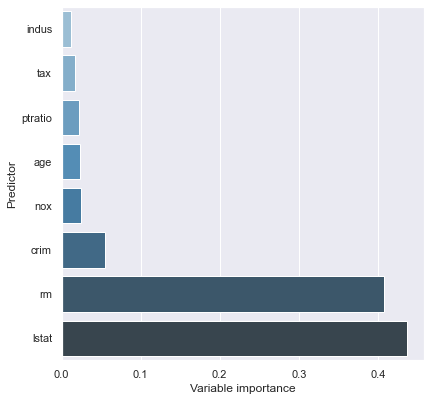

In [8]:
import seaborn as sns
sns.set_theme(color_codes=True)

#create a series of num that starts from zero and goes up to the length of the features_names variable
y_ticks = np.arange(0, len(feature_names))

#define the size of the figure
fx, ax = plt.subplots(figsize = (6.5, 6.5))

#plot a barplot and define the x and y values, the dataset that will be used and the colours to be used
ax = sns.barplot(x='Variable importance', y = 'Predictor', data = df_1, palette = 'Blues_d')

plt.savefig('Fig001.pdf')

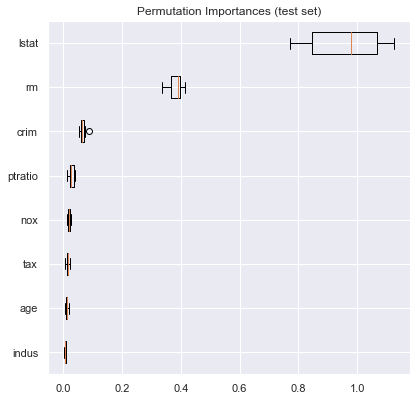

In [9]:
#run the permutation importance for the random forest using the testing X and Y data
#n_repeat defines the num of times to permute a feature
#random_state allows to be able to replicate the results
#n_jobs defines the num of jobs to run in parallel (that refers to multi-processing)
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=20)

#sort the importances_mean from lowest to largest
#importances_mean is the average importance for the n_repeats
sorted_idx = result.importances_mean.argsort()

#define the figure size
fx, ax = plt.subplots(figsize=(6.5,6.5))

#create a boxplot using the sorted importances
#use for labels in the y-axis the names of the testing X dataset
#vert allows to create a horizontal boxplot with lines going from left to right instead of being vertical
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])

#define the general title of the boxplot
ax.set_title('Permutation Importances (test set)')
plt.show()